# K-means  
ref: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_

print('centroids: {}'.format(centroids))
print('prediction on each data: {}'.format(labels))

accuracy = accuracy_score(y, labels)
num_correct_samples = accuracy_score(y, labels, normalize=False)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))

centroids: [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
prediction on each data: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
number of correct sample: 134
accuracy: 0.8933333333333333


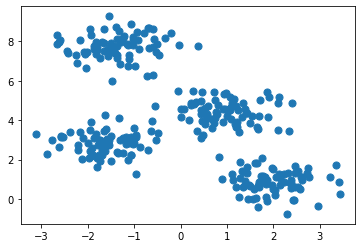

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

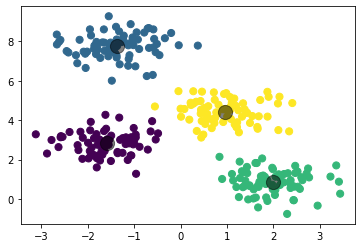

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## silhouette score   
WSS(Within Cluster Sum of Squares)/BSS(Between Cluster Sum of Squares)  
![alt text](./images/silhouette_score.PNG)
ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [6]:
from sklearn import cluster, datasets, metrics

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(iris_X)
cluster_labels = kmeans_fit.labels_

#print(cluster_labels)
# 印出績效
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.5528190123564095


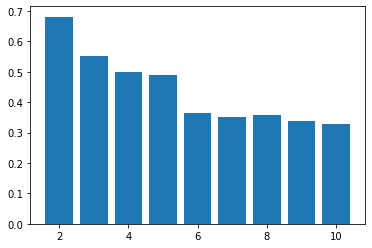

[0.6810461692117462, 0.5528190123564095, 0.49805050499728737, 0.4887488870931056, 0.36483400396700255, 0.35164278465229293, 0.35745369258527165, 0.3388287029048796, 0.3268137382802506]


In [7]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(iris_X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [10]:
# 將彩色內的照片分成k群色彩

import numpy as np
import cv2
from sklearn.cluster import KMeans

image = cv2.imread('test_image.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
# ref: https://cg2010studio.com/2011/11/13/lab-%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%96%93-lab-color-space/

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 10)

labels = clt.fit_predict(image)

print('cluster is :\n{}'.format(clt.cluster_centers_))
quant = clt.cluster_centers_.astype("uint8")[labels]
print('quant is:\n{}'.format(quant))

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('generated.jpg', quant)
cv2.waitKey(0)
cv2.destroyAllWindows()

cluster is :
[[197.47127021 125.35601024 111.91149072]
 [107.41999746 114.74773663 157.2282236 ]
 [ 30.86892374 129.75425594 136.06339136]
 [145.0309054  132.19199992  91.62566114]
 [127.95498137 114.72304034 160.82915115]
 [ 58.29978147 120.18683835 143.45603842]
 [212.73807056 126.66879185 118.92452985]
 [152.15044957 117.20307588 163.44842502]
 [169.77031423 128.41430959 101.26554905]
 [ 84.41848031 116.75904603 150.5375929 ]]
quant is:
[[212 126 118]
 [212 126 118]
 [212 126 118]
 ...
 [152 117 163]
 [152 117 163]
 [152 117 163]]


In [11]:
labels

array([6, 6, 6, ..., 7, 7, 7])